In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
sns.set_style('darkgrid')

In [9]:
!pip install --upgrade imbalanced-learn scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [10]:
!pip install --upgrade scikit-learn


In [11]:
!pip install imbalanced-learn==0.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2


In [12]:
!pip install scikit-learn matplotlib

In [13]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.8.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scikit-learn, scipy
Required-by: 


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings (action="ignore")

In [16]:
import sklearn
print(sklearn.__version__)


1.4.2


In [17]:
#from imblearn.over_sampling import SMOTE
#from sklearn.metrics import plot_confusion_matrix(((#error)))

In [19]:
data = pd.read_csv("/content/fetal_health.csv")

In [20]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [21]:
data.shape

(2126, 22)

Data Preparation
#1.Handling Missing Values

In [22]:
#data.info()

In [23]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#3 Handling Imbalance Data

In [24]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

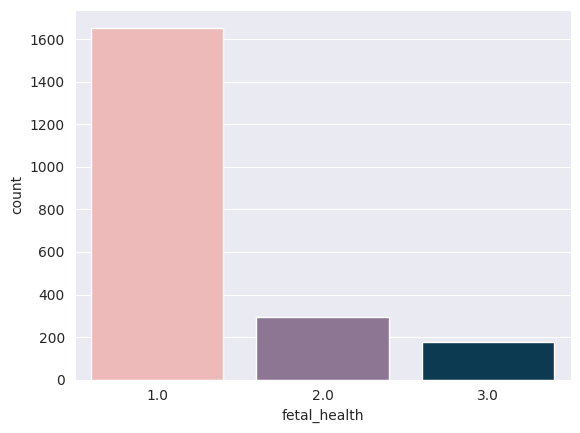

In [25]:
colours=["#f7b2b0", "#8f7198", "#003f5c"]

sns.countplot(data=data,x="fetal_health",palette=colours)

Exploratory Data Analysis
#Descriptive Statistics

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Visual Analysis
#Univariate analysis

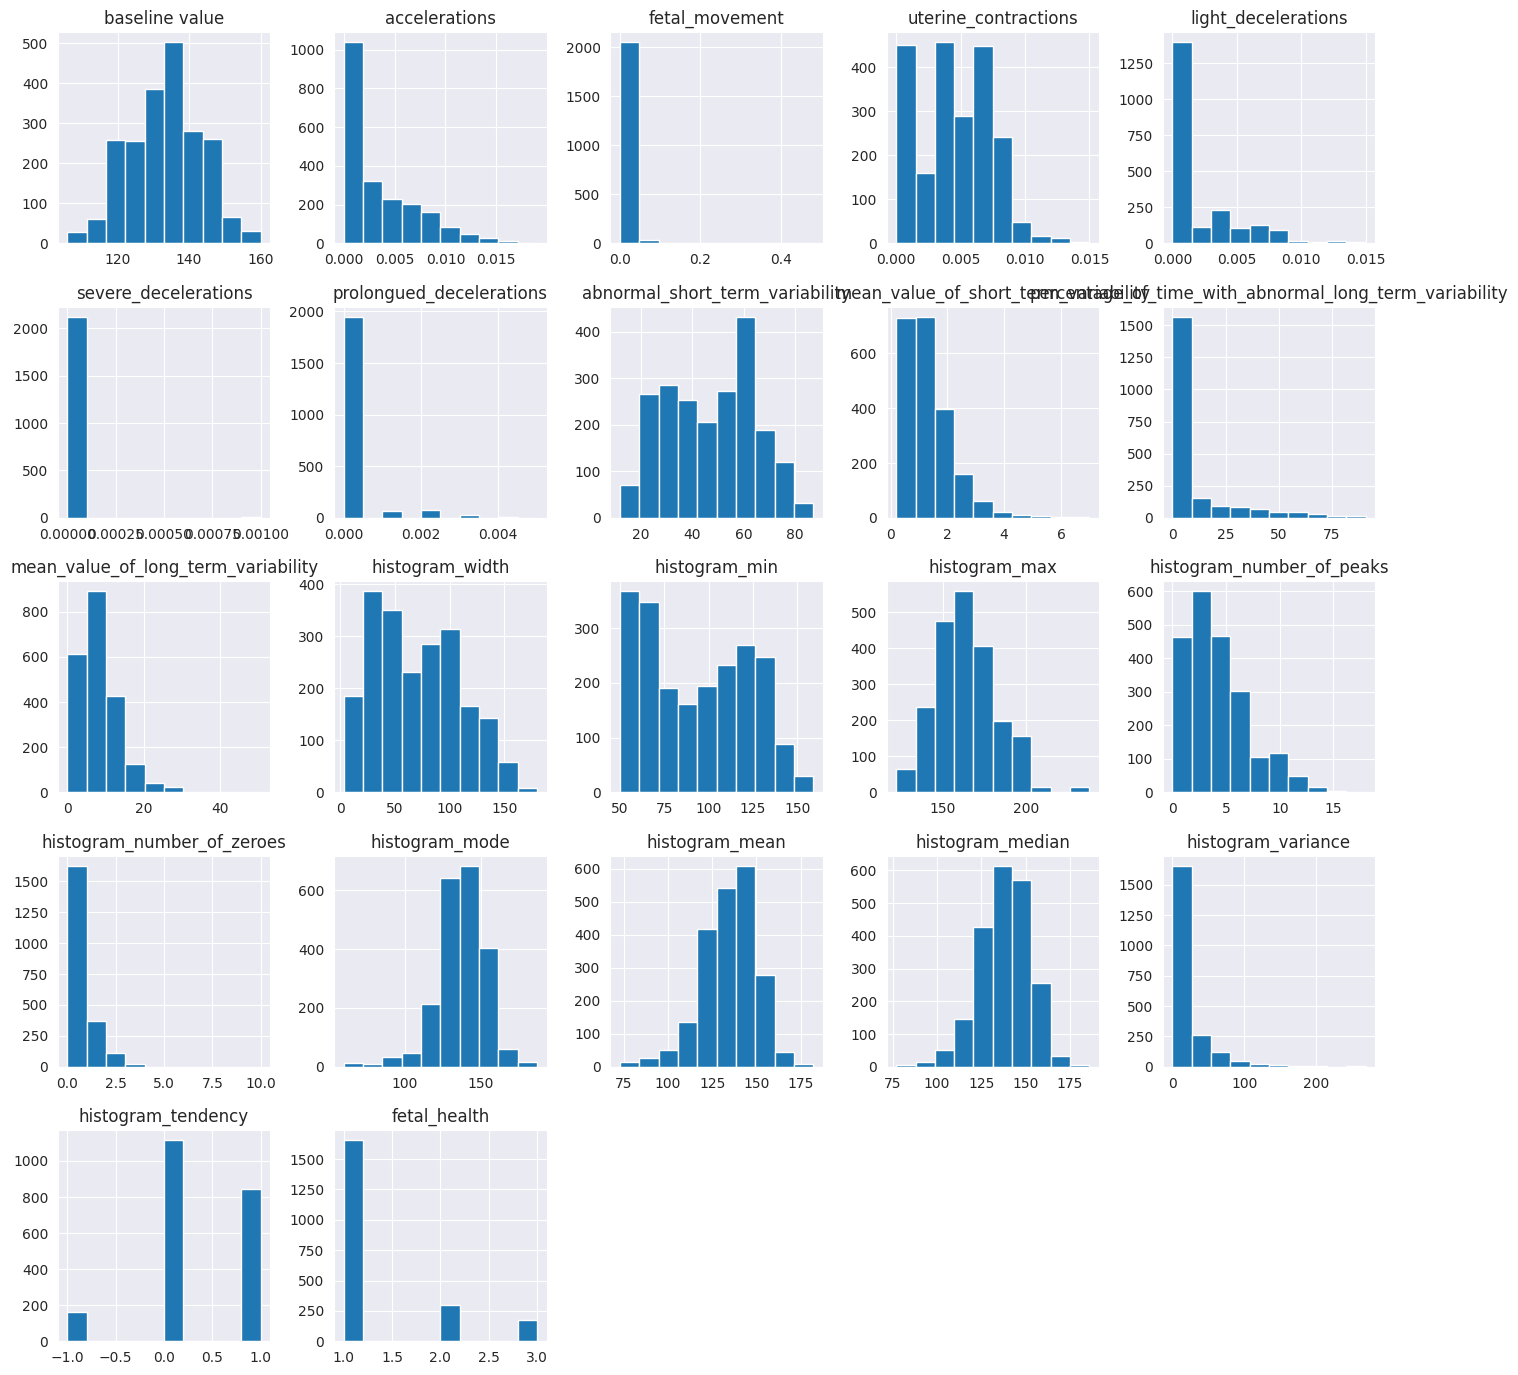

In [27]:
data.hist(figsize=(17,17),layout=(5,5),sharex=False);

#Bivariate Analysis

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

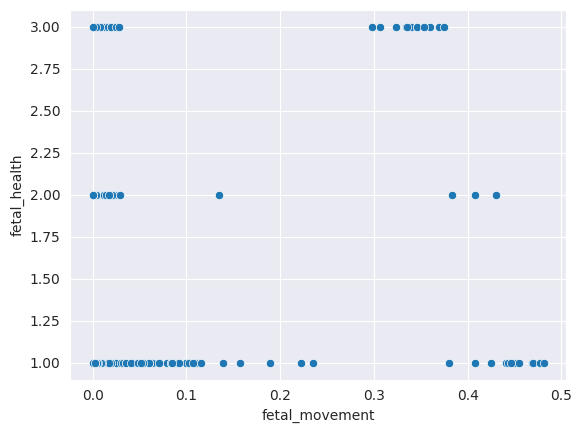

In [28]:
import seaborn as sns

sns.scatterplot(x=data.fetal_movement, y=data.fetal_health)


#Multivariate analysis

<Axes: >

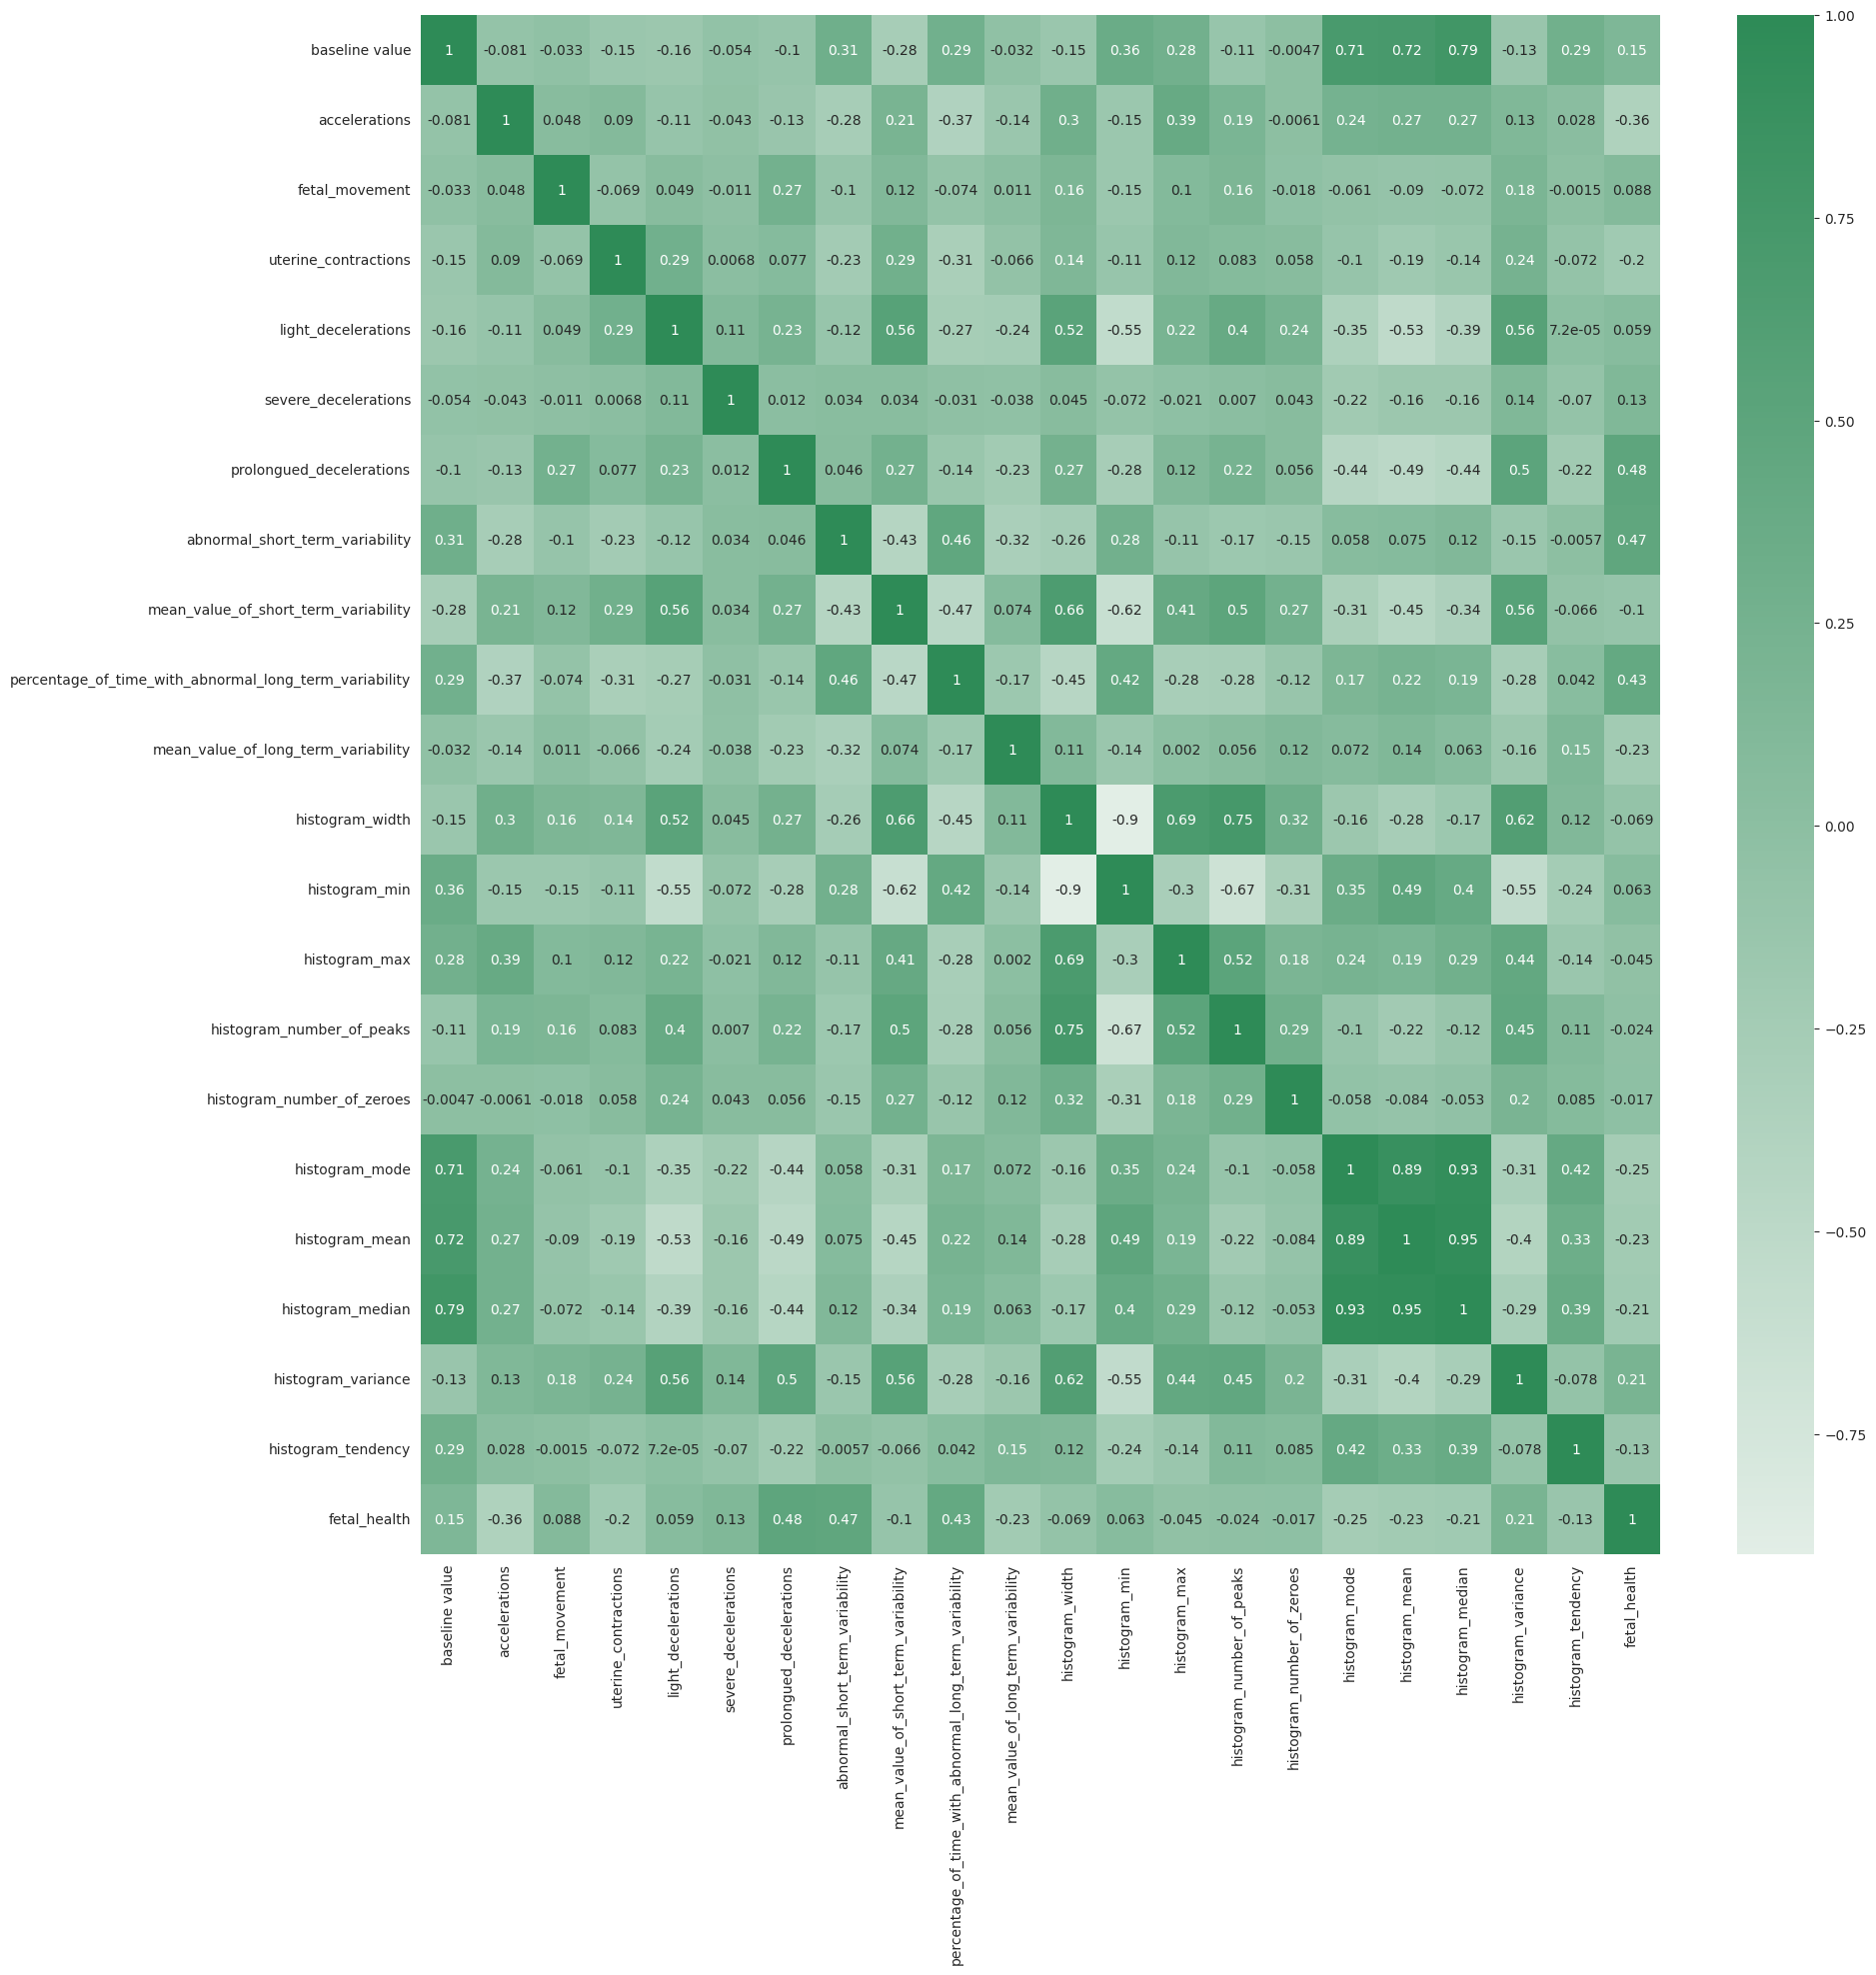

In [29]:
#correlation matrix
corrmat=data.corr()
plt.figure(figsize=(20,20))

cmap=sns.light_palette("seagreen",as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [30]:
data.drop(columns=["histogram_mean"],axis=1, inplace=True)

In [31]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [32]:
print(data.columns)


Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_median',
       'histogram_variance', 'histogram_tendency', 'fetal_health'],
      dtype='object')


In [33]:

new_data=data.loc[:,["prolongued_decelerations","abnormal_short_term_variability","percentage_of_time_with_abnormal_long_term_variability"]]

In [34]:
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
0,0.0,73.0,43.0
1,0.0,17.0,0.0
2,0.0,16.0,0.0
3,0.0,16.0,0.0
4,0.0,16.0,0.0


 Splitting data into train and test



In [35]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

Applying SMOTE for balancing the data

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [37]:
# Assuming you have a DataFrame called data containing your features and labels
x = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Labels



In [38]:
X_smote, y_smote = smote.fit_resample(x, y)

In [39]:
from collections import Counter
print ("Before SMOTE :" , Counter(y))
print ("After SMOTE:", Counter(y_smote))

Before SMOTE : Counter({1.0: 1655, 2.0: 295, 3.0: 176})
After SMOTE: Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 10)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [42]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score








#Model Building


#Training The Model In Multiple Algorithms
#Random forest model

In [44]:
#Building the random forest model
RF_model = RandomForestClassifier()

RF_model.fit(x_train, y_train)

predictions=RF_model.predict(x_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)


array([[480,  10,   4],
       [ 10, 475,   1],
       [  2,   2, 506]])

In [45]:
size = len(x_train)  # Assuming X_train is your training feature matrix
print("For the amount of training data is: ", size)


For the amount of training data is:  3475


For the amount of training data is:  3475
Accuracy of RandomForestClassifier:  0.9805369127516779


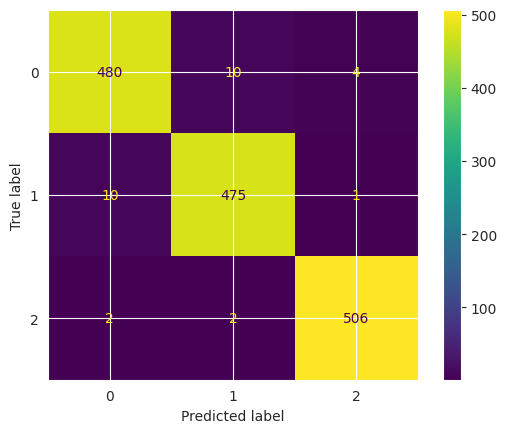

In [46]:
print("For the amount of training data is: ", len(x_train))
#printing the train accuracy and test accuracy
print("Accuracy of RandomForestClassifier: ", RF_model.score(x_test, y_test))

cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()


Decision Tree




In [51]:
#Building the decision tree model
DT_model = DecisionTreeClassifier()

DT_model.fit(x_train, y_train)

predictions = DT_model.predict(x_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)


0.9543624161073826
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       494
         2.0       0.94      0.95      0.94       486
         3.0       0.97      0.98      0.97       510

    accuracy                           0.95      1490
   macro avg       0.95      0.95      0.95      1490
weighted avg       0.95      0.95      0.95      1490



array([[464,  22,   8],
       [ 16, 460,  10],
       [  4,   8, 498]])

For the amounts of training data is:  3475
Accuracy of DecisionTreeClassifier:  0.9543624161073826


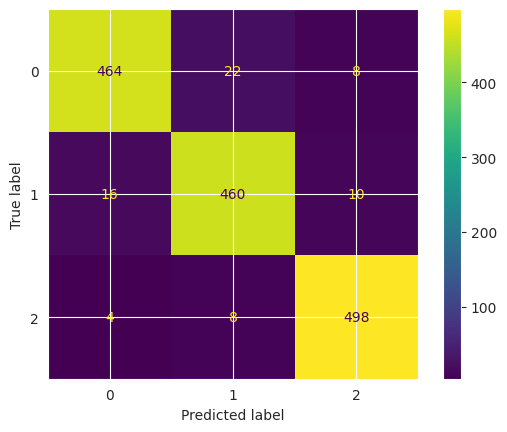

In [52]:
print("For the amounts of training data is: ",size)
#printing the train accuracy and test accuracy
print("Accuracy of DecisionTreeClassifier: ",DT_model.score(x_test,y_test))
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()

Logistic Regression

In [56]:
#Building the Logistic Regression model
LR_model = LogisticRegression()

LR_model.fit(x_train, y_train)

predictions = LR_model.predict(x_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)


0.8657718120805369
              precision    recall  f1-score   support

         1.0       0.94      0.88      0.91       494
         2.0       0.78      0.87      0.82       486
         3.0       0.89      0.85      0.87       510

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490



array([[433,  51,  10],
       [ 20, 422,  44],
       [  6,  69, 435]])

For the amounts of training data is:  3475
Accuracy of LogisticRegression:  0.8657718120805369


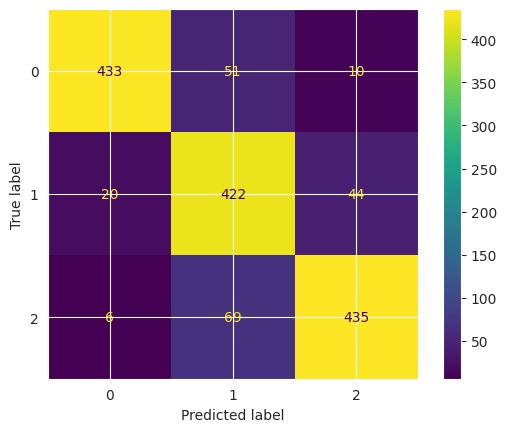

In [57]:
print("For the amounts of training data is: ",size)
#printing the train accuracy and test accuracy
print("Accuracy of LogisticRegression: ",LR_model.score(x_test,y_test))
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()

K-Nearest Model

In [ ]:
#Building the KNN model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)

predictions = KNN_model.predict(x_test)

print(accuracy_score(y_test, predictions))

In [ ]:
print("For the amounts of training data is: ",size)
#printing the train accuracy and test accuracy
print("Accuracy of KNeighborsClassifier: ",KNN_model.score(x_test,y_test))
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()

In [60]:
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

         1.0       0.94      0.88      0.91       494
         2.0       0.78      0.87      0.82       486
         3.0       0.89      0.85      0.87       510

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490



array([[433,  51,  10],
       [ 20, 422,  44],
       [  6,  69, 435]])

#Testing The Model

In [ ]:
RF_model.predict([[0.345, 0.1225, 23346, 0.23456, 0.987, 2345, 123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [ ]:
RF_model.predict([[0.000, 0.0, 73.0, 43.0, 2.4, 73.0, 120.0, 121.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


Performance Testing & Hyperparameter Tuning

#Testing Model With Multiple Evaluation Metrics

Comparing the model

In [ ]:
import pandas as pd

# Define the names and scores variables
names = ["RandomForestClassifier", "DecisionTreeClassifier", "LogisticRegression", "KNeighboClassifier"]
scores = [0.9791946308724833,0.9583892617449664,0.8711409395973154,0.9456375838926174]  # Replace with your actual scores list

# Create a DataFrame with the correct number of rows
df = pd.DataFrame(index=range(len(names)))

# Add a 'name' column with the names list
df['name'] = names

# Add a 'score' column with the scores list
df['score'] = scores

# Print the DataFrame
print(df)


In [ ]:
sns.set(style="whitegrid")

ax=sns.barplot(y="name", x="score", data=df)

Model deployment


#Save The Best Model

In [ ]:
import pickle
pickle.dump(RF_model,open('fetal_health1.pkl','wb'))

In [ ]:
pickle.dump(scaler,open('scale.pkl','wb'))